# Lab 6.02 - Regression analysis

In [1]:
# Package imports
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Dataframe
import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic plot
import seaborn as sns                               # Advanced dataviz
from sklearn.linear_model import LinearRegression

## Exercise 2: Flemish agricultural and horticultural businesses

1. Use the dataset agriculture flanders.csv. The file contains data about agricultural and horticultural businesses in Flanders

    Source: Departement Landbouw en Visserij op basis van StatBel

In [2]:
farms = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/main/data/agriculture%20flanders.csv', delimiter = ";", decimal=',')
# Show the first few records of the Data Frame
farms.head()

,year,number_of_farms,average_area_per_farm_(ha)
0,1980,75706,8.38
1,1981,73292,8.58
2,1982,71255,8.79
3,1983,69807,8.94
4,1984,68083,9.15


2. What are the datatypes for each of the columns.

In [3]:
farms.dtypes

year                            int64
number_of_farms                 int64
average_area_per_farm_(ha)    float64
dtype: object

3. Draw a scatter plot of the number of farms versus the year.


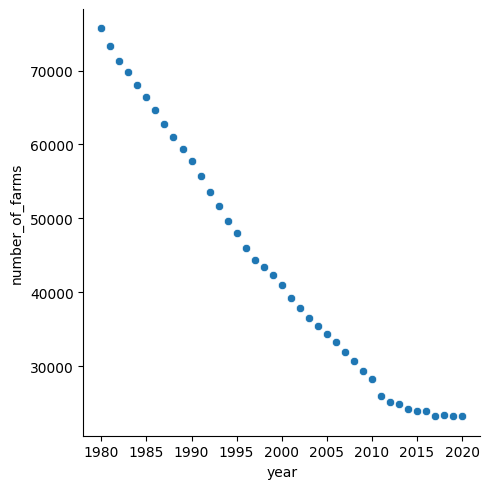

In [4]:
sns.relplot(data=farms,  x='year', y='number_of_farms');

4. Is there a positive / negative relationship between year and number_of_farms?

    $R = -0.9861066349492859$

In [7]:
np.cov(
    farms.year,
    farms.number_of_farms,
    ddof=1)[0][1]

# Python function numpy.corrcoef() - returns a matrix, like numpy.cov()
cor = np.corrcoef(
    farms.year,
    farms.number_of_farms)[0][1]
print(f"R ≈ {cor:.4f}")

# Negative relationship

R ≈ -0.9861


6. Is there a strong relationship between year and 'number_of_farms'?

    $R^2 = 0.9724062954910041$

In [8]:
cor**2
# Strong relationship

0.9724062954910041

7. Draw a scatter plot of the 'average_area_per_farm_(ha)' versus the year.

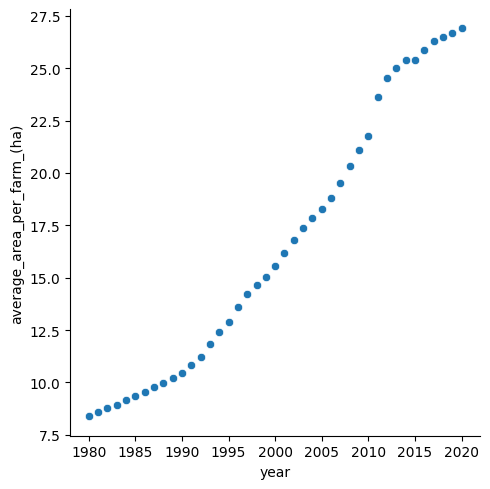

In [9]:
sns.relplot(data=farms,  x='year', y='average_area_per_farm_(ha)');

8. What will be the 'average_area_per_farm_(ha)' in 2035?

Average area in 2035 = 34.91987804878045

In [12]:
# y = ax + b
x = farms.year
y = farms['average_area_per_farm_(ha)']
a, b = np.polyfit(x, y, 1)

print(f"Regression line: y = {a} * x + {b}")
a * 2035 + b

Regression line: y = 0.5242334494773592 * x + -1031.8951916376452


34.919878048780674

8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

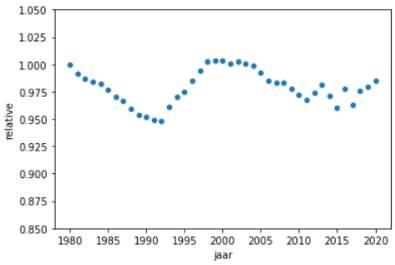


In [37]:
farms['total_argricultural_area'] = farms['average_area_per_farm_(ha)'] * farms['number_of_farms']
area_1980 = farms.iloc[0, 3]
print(area_1980)
farms['relative_to_1980'] = farms['total_argricultural_area'] / area_1980
farms.head(10)

634416.28


,year,number_of_farms,average_area_per_farm_(ha),total_argricultural_area,relative_to_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941
5,1985,66408,9.33,619586.64,0.976625
6,1986,64624,9.53,615866.72,0.970761
7,1987,62814,9.76,613064.64,0.966344
8,1988,60983,9.98,608610.34,0.959323
9,1989,59365,10.19,604929.35,0.953521


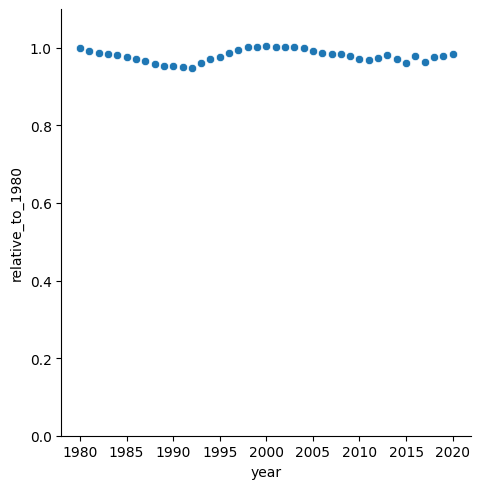

In [39]:
g = sns.relplot(data=farms,  x='year', y='relative_to_1980');
g.set(ylim = [0, 1.1])